In [1]:
import pickle
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
!ls

analysis.ipynb
Analysis.ipynb
Bandit_experiment.ipynb
cfg.py
data.py
eGreedyMAB_3000_500_BernoulliArm_0.25_results.pkl
eGreedyMAB_3000_500_BernoulliArm_1.0_results.pkl
eGreedyMAB_3000_500_GaussianArm_0.25_results.pkl
eGreedyMAB_3000_500_GaussianArm_1.0_results.pkl
linucb.py
mab.py
main.py
__pycache__
run.sh


In [3]:
def process(df):
    ## get cumulative reward
    cumsum_base = np.array([], dtype='float')
    for e in df['sim'].unique():
        rundf = df[df['sim'] == e]
        run_cumsum = np.cumsum(rundf['reward'])
        cumsum_base = np.append(cumsum_base, run_cumsum)
    df['cumulative_reward'] = cumsum_base
    
    ## check if the optimal arm is selected at each run
    df['chosen_optimal'] = (df['chosen_arm'] == df['optimal_arm']).astype('int')
    
    ## groupby
    result = df[['epsilon', 'step', 'reward', 'chosen_optimal']].groupby(by=['epsilon', 'step']).mean(numeric_only=False)
    result.reset_index(drop=False, inplace=True)
    
    return result

In [4]:
def plot_results(dfs, column, title, figsize=(12, 8)):
    split = column.split('_')
    split[0] = split[0][0].upper() + split[0][1:]
    ylabel = ' '.join(split)
    
    plt.figure(figsize=figsize)
    for item in dfs:
        plt.plot(item[column], label=f"eps={item['epsilon'].iloc[0]}")
    plt.grid(True)
    plt.xlabel("Step")
    plt.ylabel(ylabel)
    plt.legend()
    plt.title(title)
    plt.show()

# alpha = 1

In [5]:
with open("./eGreedyMAB_3000_500_BernoulliArm_1.0_results.pkl", 'rb') as f:
    bernoulli = pickle.load(f)
    
with open("./eGreedyMAB_3000_500_GaussianArm_1.0_results.pkl", 'rb') as f:
    gaussian = pickle.load(f)

In [6]:
print('bernoulli')
display(bernoulli[0].head())
print()
display(bernoulli[0].tail())
print()
print('gaussian')
display(gaussian[0].head())
print()
display(gaussian[0].tail())

bernoulli


,epsilon,sim,step,chosen_arm,optimal_arm,reward
0,0.0,0,0,5,7,0.0
1,0.0,0,1,4,7,1.0
2,0.0,0,2,4,7,1.0
3,0.0,0,3,4,7,1.0
4,0.0,0,4,4,7,1.0


,epsilon,sim,step,chosen_arm,optimal_arm,reward
1499995,0.0,2999,495,4,7,1.0
1499996,0.0,2999,496,4,7,0.0
1499997,0.0,2999,497,4,7,1.0
1499998,0.0,2999,498,4,7,1.0
1499999,0.0,2999,499,4,7,1.0



gaussian


,epsilon,sim,step,chosen_arm,optimal_arm,reward
0,0.0,0,0,4,5,7.966255
1,0.0,0,1,4,5,8.085414
2,0.0,0,2,4,5,7.597726
3,0.0,0,3,4,5,8.323541
4,0.0,0,4,4,5,8.427237


,epsilon,sim,step,chosen_arm,optimal_arm,reward
1499995,0.0,2999,495,1,5,10.200642
1499996,0.0,2999,496,1,5,7.797663
1499997,0.0,2999,497,1,5,10.112425
1499998,0.0,2999,498,1,5,9.671372
1499999,0.0,2999,499,1,5,10.927909


In [7]:
bern_results = []
for df in tqdm(bernoulli):
    bern_results.append(process(df))
    
gaus_results = []
for df in tqdm(gaussian):
    gaus_results.append(process(df))

100%|██████████| 8/8 [00:44<00:00,  5.57s/it]


In [8]:
print(f"Bernoulli\n")
print("Greedy")
display(bern_results[0].head())
print()
display(bern_results[0].tail())
print()

print("egreedy")
display(bern_results[1].head())
print()
display(bern_results[1].tail())

Bernoulli

Greedy


,epsilon,step,reward,chosen_optimal
0,0.0,0,0.681667,0.100000
1,0.0,1,0.744000,0.134000
2,0.0,2,0.757333,0.142000
3,0.0,3,0.759667,0.145333
4,0.0,4,0.769333,0.145333


,epsilon,step,reward,chosen_optimal
495,0.0,495,0.772667,0.146333
496,0.0,496,0.785333,0.146333
497,0.0,497,0.761333,0.146333
498,0.0,498,0.768667,0.146333
499,0.0,499,0.767333,0.146333



egreedy


,epsilon,step,reward,chosen_optimal
0,0.152,0,0.683333,0.099667
1,0.152,1,0.728000,0.127667
2,0.152,2,0.746333,0.134000
3,0.152,3,0.751667,0.139667
4,0.152,4,0.764333,0.137667


,epsilon,step,reward,chosen_optimal
495,0.152,495,0.862000,0.382333
496,0.152,496,0.868000,0.379667
497,0.152,497,0.877333,0.381667
498,0.152,498,0.866000,0.370333
499,0.152,499,0.873333,0.374667


In [9]:
print(f"Gaussian\n")
print("Greedy")
display(gaus_results[0].head())
print()
display(gaus_results[0].tail())
print()

print("egreedy")
display(gaus_results[1].head())
print()
display(gaus_results[1].tail())

Gaussian

Greedy


,epsilon,step,reward,chosen_optimal
0,0.0,0,6.311440,0.093000
1,0.0,1,6.634488,0.099667
2,0.0,2,6.753923,0.101000
3,0.0,3,6.811616,0.101333
4,0.0,4,6.861381,0.102333


,epsilon,step,reward,chosen_optimal
495,0.0,495,7.961217,0.129333
496,0.0,496,7.939974,0.129333
497,0.0,497,7.981833,0.129333
498,0.0,498,7.962971,0.129333
499,0.0,499,7.992679,0.129333



egreedy


,epsilon,step,reward,chosen_optimal
0,0.364,0,6.353416,0.100667
1,0.364,1,6.557317,0.099333
2,0.364,2,7.016122,0.119333
3,0.364,3,7.559406,0.145000
4,0.364,4,7.830417,0.157333


,epsilon,step,reward,chosen_optimal
495,0.364,495,8.548105,0.192000
496,0.364,496,8.554386,0.201667
497,0.364,497,8.580325,0.207000
498,0.364,498,8.688531,0.214667
499,0.364,499,8.615868,0.209000


## Optimal Action %

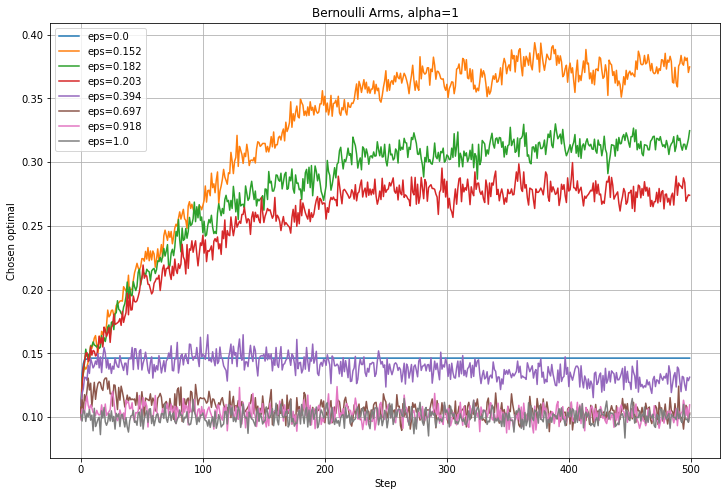

In [10]:
plot_results(bern_results, column='chosen_optimal', title="Bernoulli Arms, alpha=1")

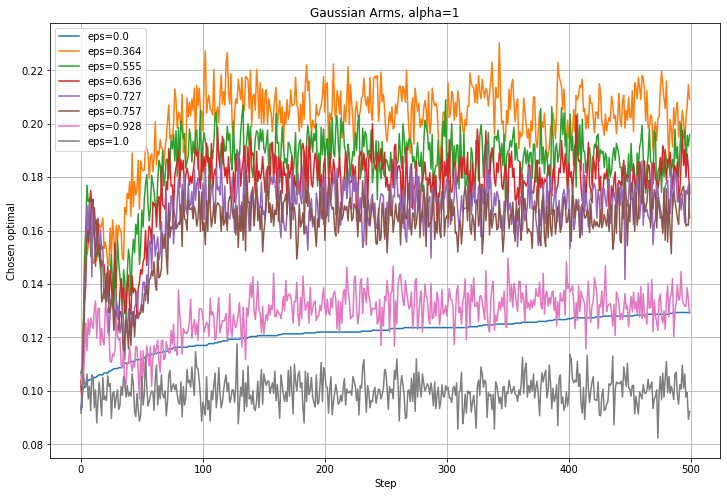

In [11]:
plot_results(gaus_results, column='chosen_optimal', title="Gaussian Arms, alpha=1")

## Average Reward

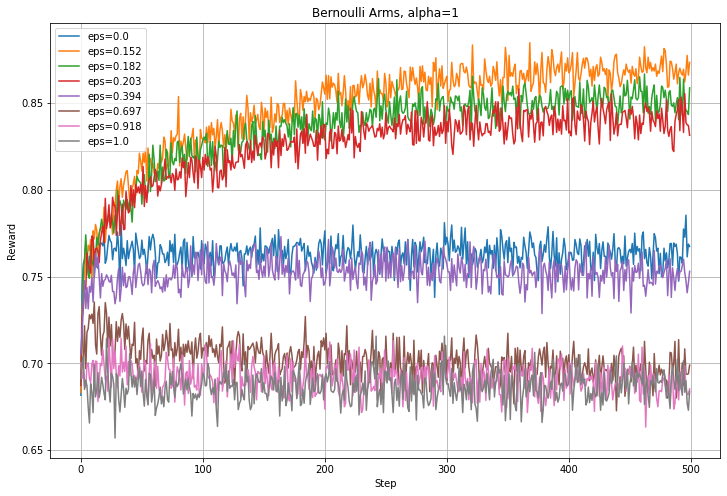

In [12]:
plot_results(bern_results, column='reward', title="Bernoulli Arms, alpha=1")

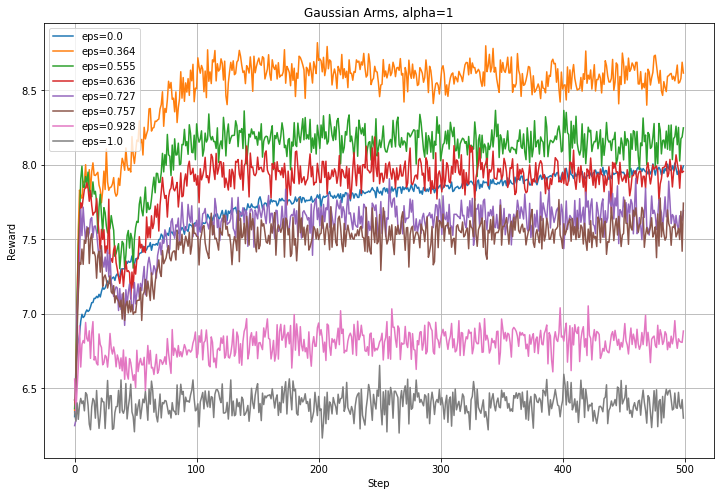

In [13]:
plot_results(gaus_results, column='reward', title="Gaussian Arms, alpha=1")

# alpha=0.25

In [14]:
with open("./eGreedyMAB_3000_500_BernoulliArm_0.25_results.pkl", 'rb') as f:
    bernoulli = pickle.load(f)
    
with open("./eGreedyMAB_3000_500_GaussianArm_0.25_results.pkl", 'rb') as f:
    gaussian = pickle.load(f)

In [15]:
print('bernoulli')
display(bernoulli[0].head())
print()
display(bernoulli[0].tail())
print()
print('gaussian')
display(gaussian[0].head())
print()
display(gaussian[0].tail())

bernoulli


,epsilon,sim,step,chosen_arm,optimal_arm,reward
0,0.0,0,0,2,5,0.0
1,0.0,0,1,8,5,0.0
2,0.0,0,2,4,5,1.0
3,0.0,0,3,4,5,1.0
4,0.0,0,4,4,5,1.0


,epsilon,sim,step,chosen_arm,optimal_arm,reward
1499995,0.0,2999,495,8,5,1.0
1499996,0.0,2999,496,8,5,1.0
1499997,0.0,2999,497,8,5,0.0
1499998,0.0,2999,498,8,5,1.0
1499999,0.0,2999,499,8,5,1.0



gaussian


,epsilon,sim,step,chosen_arm,optimal_arm,reward
0,0.0,0,0,0,2,0.384437
1,0.0,0,1,0,2,2.219899
2,0.0,0,2,0,2,0.706799
3,0.0,0,3,0,2,2.630490
4,0.0,0,4,0,2,2.350393


,epsilon,sim,step,chosen_arm,optimal_arm,reward
1499995,0.0,2999,495,9,2,13.375197
1499996,0.0,2999,496,9,2,11.329264
1499997,0.0,2999,497,9,2,9.818185
1499998,0.0,2999,498,9,2,12.610379
1499999,0.0,2999,499,9,2,10.149720


In [16]:
bern_results = []
for df in tqdm(bernoulli):
    bern_results.append(process(df))
    
gaus_results = []
for df in tqdm(gaussian):
    gaus_results.append(process(df))

100%|██████████| 8/8 [00:43<00:00,  5.47s/it]


In [17]:
print(f"Bernoulli\n")
print("Greedy")
display(bern_results[0].head())
print()
display(bern_results[0].tail())
print()

print("egreedy")
display(bern_results[1].head())
print()
display(bern_results[1].tail())

Bernoulli

Greedy


,epsilon,step,reward,chosen_optimal
0,0.0,0,0.523333,0.091000
1,0.0,1,0.598667,0.136000
2,0.0,2,0.620667,0.154667
3,0.0,3,0.640333,0.165667
4,0.0,4,0.646667,0.171667


,epsilon,step,reward,chosen_optimal
495,0.0,495,0.664000,0.174667
496,0.0,496,0.663000,0.174667
497,0.0,497,0.662667,0.174667
498,0.0,498,0.670000,0.174667
499,0.0,499,0.668667,0.174667



egreedy


,epsilon,step,reward,chosen_optimal
0,0.112,0,0.536333,0.105333
1,0.112,1,0.606667,0.145333
2,0.112,2,0.633333,0.164333
3,0.112,3,0.647333,0.175333
4,0.112,4,0.666333,0.180667


,epsilon,step,reward,chosen_optimal
495,0.112,495,0.663667,0.185
496,0.112,496,0.669000,0.185
497,0.112,497,0.666667,0.185
498,0.112,498,0.649667,0.185
499,0.112,499,0.668000,0.185


In [18]:
print(f"Gaussian\n")
print("Greedy")
display(gaus_results[0].head())
print()
display(gaus_results[0].tail())
print()

print("egreedy")
display(gaus_results[1].head())
print()
display(gaus_results[1].tail())

Gaussian

Greedy


,epsilon,step,reward,chosen_optimal
0,0.0,0,6.679179,0.104000
1,0.0,1,6.768752,0.106333
2,0.0,2,6.818162,0.107333
3,0.0,3,6.824733,0.107333
4,0.0,4,6.867401,0.107333


,epsilon,step,reward,chosen_optimal
495,0.0,495,8.398446,0.141000
496,0.0,496,8.385774,0.141000
497,0.0,497,8.409143,0.141333
498,0.0,498,8.413753,0.141333
499,0.0,499,8.377714,0.141333



egreedy


,epsilon,step,reward,chosen_optimal
0,0.142,0,6.561249,0.092333
1,0.142,1,6.684228,0.096667
2,0.142,2,6.787199,0.097667
3,0.142,3,6.782381,0.098333
4,0.142,4,6.812481,0.097667


,epsilon,step,reward,chosen_optimal
495,0.142,495,8.276542,0.124667
496,0.142,496,8.249302,0.125000
497,0.142,497,8.252047,0.125000
498,0.142,498,8.273364,0.125000
499,0.142,499,8.268571,0.125000


## Optimal action %

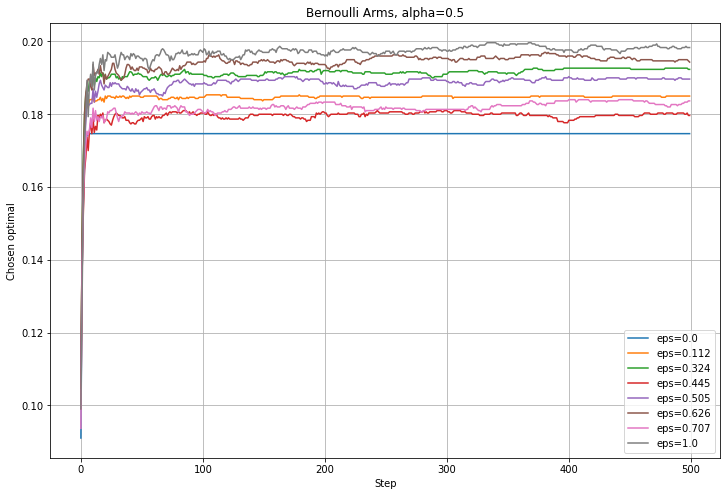

In [19]:
plot_results(bern_results, column='chosen_optimal', title="Bernoulli Arms, alpha=0.5")

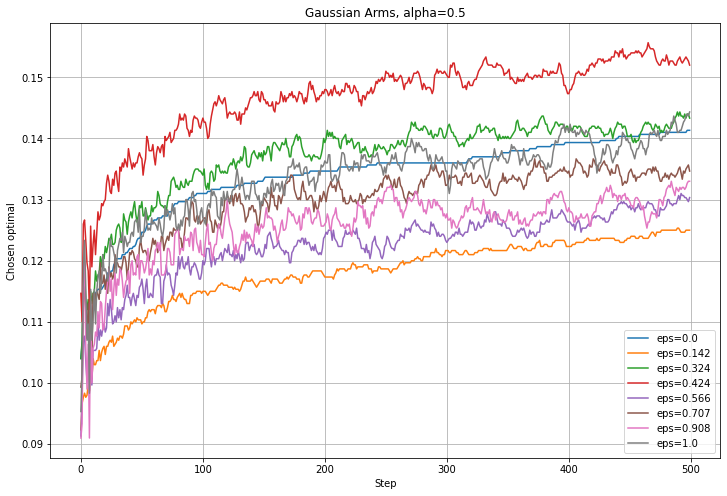

In [20]:
plot_results(gaus_results, column='chosen_optimal', title="Gaussian Arms, alpha=0.5")

## Average Reward

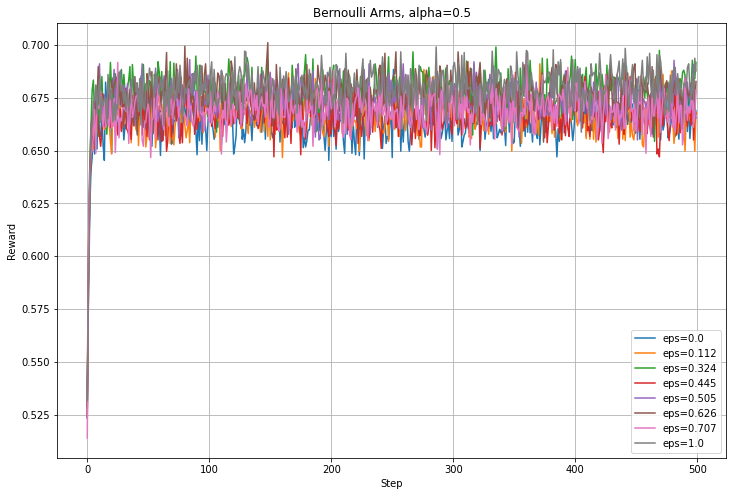

In [21]:
plot_results(bern_results, column='reward', title="Bernoulli Arms, alpha=0.5")

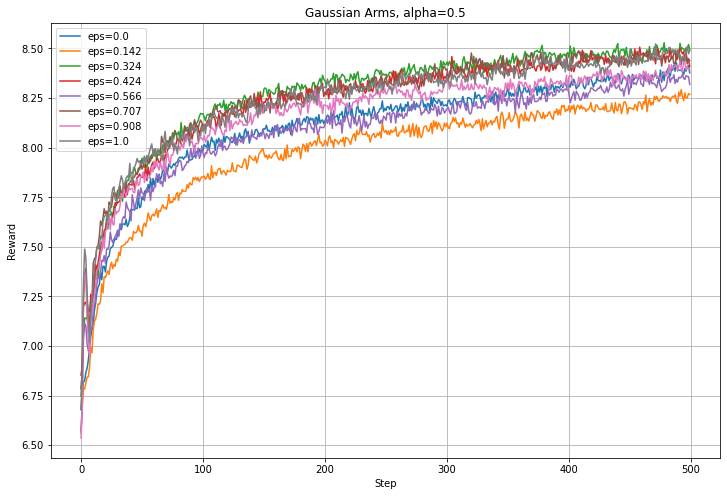

In [22]:
plot_results(gaus_results, column='reward', title="Gaussian Arms, alpha=0.5")